# Actividad Evaluable: Obtención de estadisticas descriptivas
## Covid-19 Tweets
### Autores:
- Moisés Adame Aguilar (A01660927)
- Luis Armando Mandujano Chávez (A01655899)
- Antonio Rafael Cedillo Ródriguez (A01656823)
1. Carga tus datos

In [20]:
# Se importa pandas y se utiliza la función read_csv()
import pandas as pd
df = pd.read_csv('covid19_tweets.csv')

2. Si determinas que alguna variable no sirve basándose en la actividad pasada, elimínala y justifica por qué quitaste o no variables.

Realmente, todos los valores pueden ser de utilidad para generar una cocnlusión, por lo que se dejan todos sin eliminar.


In [21]:
df.corr()

/var/folders/xb/ncyjbdvj51s3rxjrbjb6ydpc0000gn/T/ipykernel_9382/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,user_followers,user_friends,user_favourites,user_verified,is_retweet
user_followers,1.000000,-0.002722,-0.028724,0.322896,NaN
user_friends,-0.002722,1.000000,0.207825,0.013099,NaN
user_favourites,-0.028724,0.207825,1.000000,-0.060316,NaN
user_verified,0.322896,0.013099,-0.060316,1.000000,NaN
is_retweet,NaN,NaN,NaN,NaN,NaN


3. Determina un valor de k

4. Utilizando scikitlearn calcula los centros del algoritmo k-means


Como vemos en los siguientes plots, a partir de los 3 centroides podemos ver que su interpretación puede ser más difícil, sinedo a mi interpretación el análisis más óptimo el de 3 centroides, donde podemos clasificar tres tripos de usuarios: influencers, usuarios promedio y usuarios amigables, siendo estos últimos quienes se dedican principalmente a tener e interactuar con amigos.

/Users/moymac/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


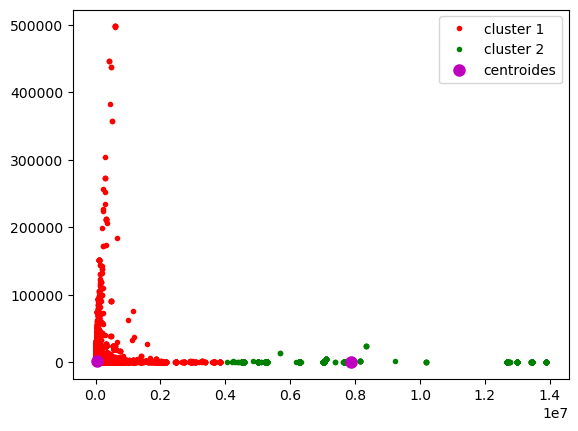

/Users/moymac/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


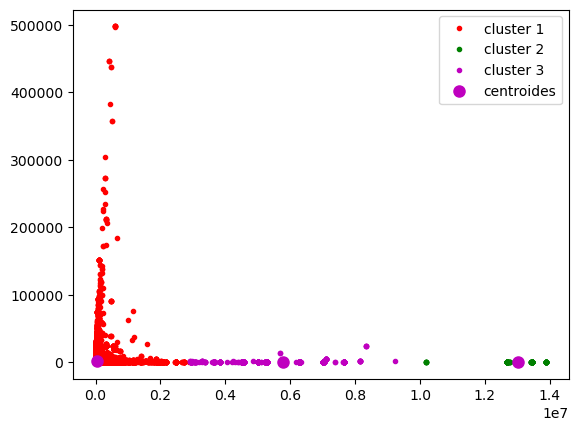

/Users/moymac/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


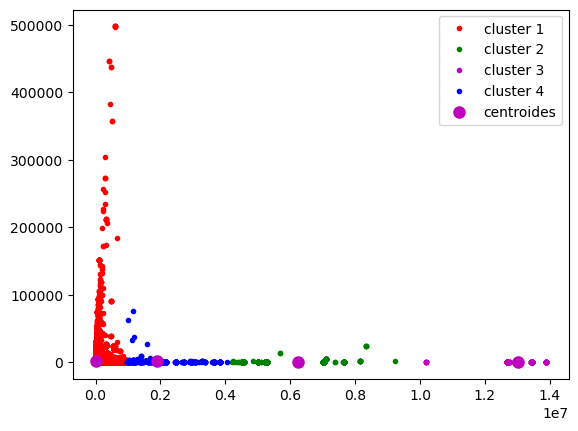

/Users/moymac/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


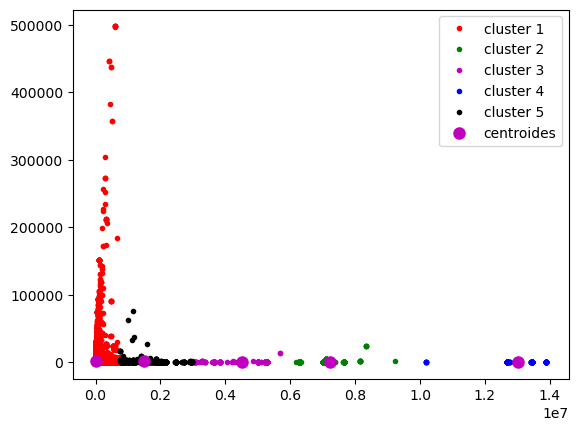

/Users/moymac/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


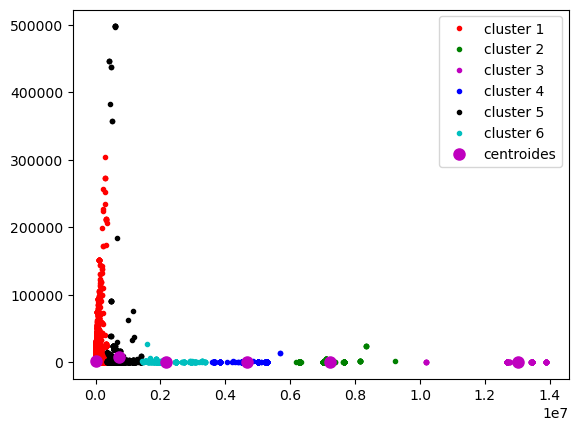

/Users/moymac/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


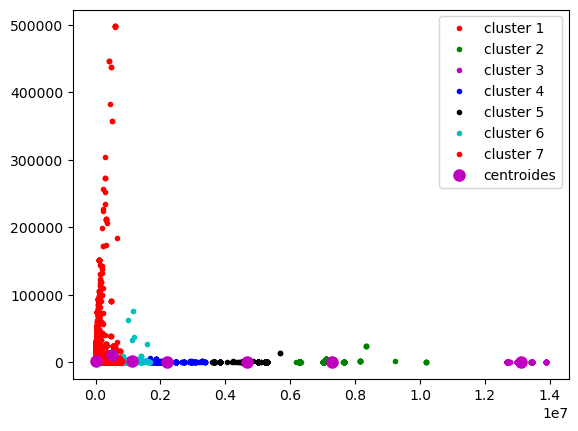

/Users/moymac/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


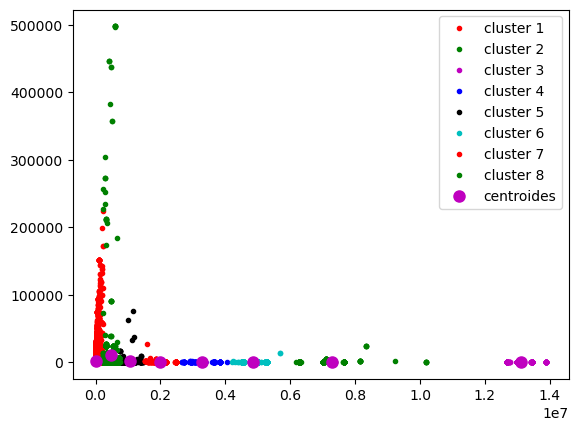

/Users/moymac/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


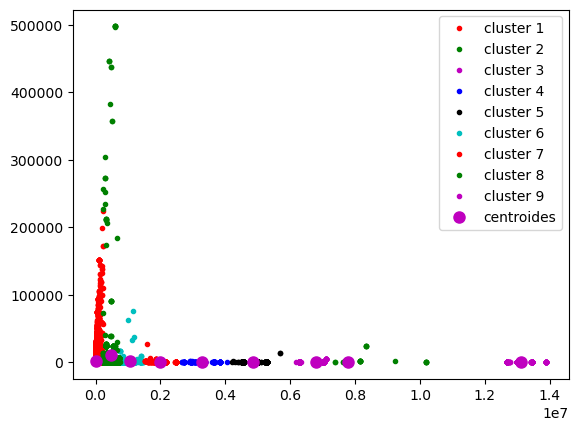

In [22]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

pairs = []
for i in range(len(df['user_followers'])):
    pairs.append([df['user_followers'][i], df['user_friends'][i]])

pairs = np.array(pairs)

color_list = ['r', 'g', 'm', 'b', 'k', 'c']


for cluster_num in range(2, 10):

    k_means = KMeans(n_clusters = cluster_num)
    k_means.fit(pairs)
    
    for index in range(cluster_num):
        plt.plot(pairs[k_means.labels_==index,0], pairs[k_means.labels_==index,1], color_list[index % 6] + '.', label=f'cluster {index + 1}')

    plt.plot(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1],'mo',markersize=8, label='centroides')
    plt.legend(loc='best')
    plt.show()

<Axes: >

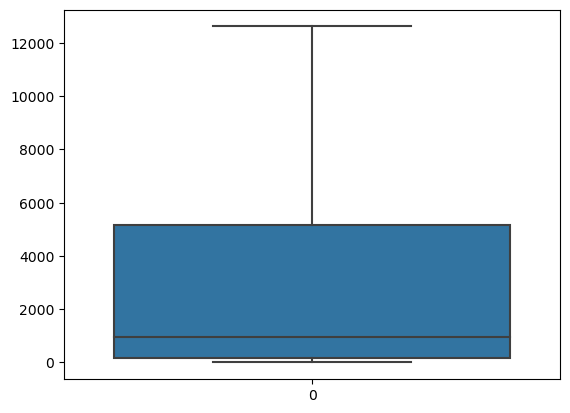

In [23]:
import seaborn as sns
sns.boxplot(data=df["user_followers"], showfliers=False)

<Axes: >

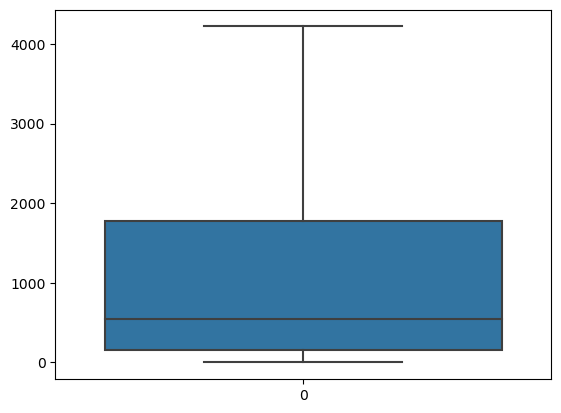

In [24]:
sns.boxplot(data=df["user_friends"], showfliers=False)

Basado en los centros responde las siguientes preguntas

1. ¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué?

Si, ya que nos permite determinar según sus seguidores y según sus amigos que tipo de usuario es y por lo tanto cual es su uso en la aplicación. 

2. ¿Cómo obtuviste el valor de k a usar?

Lo obtuvimos a través de un análisis cualitativo de los gráficos generados haciendo uso de diferentes valores de k. 

3. ¿Los centros serían más representativos si usaras un valor más alto? ¿Más bajo?

Depende de la interpretación, pero podemos decir que en este caso son mas representativos con un valor más bajo.

4. ¿Qué distancia tienen los centros entre sí? ¿Hay alguno que este muy cercano a otros?

Para n = 3 podemos ver que aproximadamente la distancia entre los puntos es de 0.6 * 1e7

5. ¿Qué pasaría con los centros si tuviéramos muchos outliers en el análisis de cajas y bigotes?

El que existan muchos outliers provoca que los centroides se vean afectados moviéndose en dirección a la zona con outliers lo que puede generar problemas en nuestra clusterización implicando la necesidad de más clusters.

6. ¿Qué puedes decir de los datos basándose en los centros?

Como podemos daros cuenta, los centroides se encuentran dispersos relativamente más cerca del eje x, siguiendo una trayectoria que lo sigue, lo cual nos habla de que para generar una conclusión sobre a que cluster petenece cada usuario es más importante enfocarnos en su cantidad de amigos que en su cantidad de seguidores. 